# 2ª. AVALIAÇÃO DE INFERENCIA ESTATÍSTICA

**Aluno**: Marcos Dantas Guimarães Filho

**Matricula**: 20200133309

## Questão 1) Os dados de venda mensal de aviões ao longo do último ano estão na tabela a seguir. Verifique se há normalidade dos dados. Considere α = 5%.

<p align="center">

| Jan | Fev | Mar | Abr | Mai | Jun | Jul | Ago | Set | Out | Nov | Dez |
|----|-----|----|-----|----|-----|----|-----|----|-----|----|-----|
|48 |52 |50 |49 |47 |50 |51 |54 |39 |56 |52 |55 |

</p>


O teste de normalidade de Shapiro-Wilk é um teste não paramétrico que verifica se os dados de uma amostra são provenientes de uma distribuição normal.
A fórmula para realizar o teste é:  $W=\frac{b^{2}}{\sum_{i=1}^{n}(x_{i}-\bar{x_{i}})^{2}}$ sendo $b=\sum_{i=1}^{n/2}a_{i,n}(x_{(n-i-1)}-x_{i})$.

Onde:
* $x_{(i)}$  é a i-ésima estatística de ordem, ou seja, o i-ésimo menor número da amostra
* $x_{i}$ é o i-ésimo número da amostra
* $\bar{x_{i}}$ é a média da amostra
* $a_{i,n}$ são constantes geradas das médias, variâncias e covariâncias das estatísticas de ordem de uma amostra aleatória de tamanho n a partir de uma
distribuição normal

In [90]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def variance(data, ddof=0):
     n = len(data)
     mean = sum(data) / n
     return sum((x - mean) ** 2 for x in data) / (n - ddof)


def shapiro_test(data, coeficients, critical_value, alpha=0.05):
    if len(coeficients) == 0:
        return False
    if not (len(data)/2) - 1 <= len(coeficients) <= (len(data)/2) + 1:
        return False

    data = sorted(data, reverse=True)

    df = pd.DataFrame(columns=["i", "n-i-1", "Ai,n", "X(n-i-1)", "X(i)", "Ai,n * (X(n-i-1) - X(i))"])
    df["i"] = range(len(data)//2)
    df["n-i-1"] = range(len(data)-1, len(data)//2-1, -1)
    df["Ai,n"] = coeficients
    df["X(n-i-1)"] = data[:len(data)//2]
    df["X(i)"] = data[:len(data)//2-1:-1]
    df["Ai,n * (X(n-i-1) - X(i))"] = df["Ai,n"] *  (df["X(n-i-1)"] - df["X(i)"])

    var = variance(data, ddof=1)
    sum = df["Ai,n * (X(n-i-1) - X(i))"].sum()

    W = (sum**2) / (var * (len(data) - 1))


    if W > critical_value:
        return "A amostra é obtida de uma população com distribuição normal", W, df
    else:
        return "A amostra é obtida de uma população com NÃO distribuição normal", W, df
    

In [91]:
jan_to_dec = [48, 52, 50, 49, 47, 50, 51, 54, 39, 56, 52, 55]
coeficients = [0.5475, 0.3325, 0.2347, 0.1586, 0.0922, 0.0303]
critical_value = 0.859
alpha = 0.05
string_result, W, df = shapiro_test(jan_to_dec, coeficients, critical_value, alpha)
print(f"""
{string_result}
W = {round(W,3)}
Alfa = {alpha}
Valor crítico = {critical_value}
""")


A amostra é obtida de uma população com distribuição normal
W = 0.898
Alfa = 0.05
Valor crítico = 0.859



Abaixo podemos visualizar o histograma dos dados, junto à linha de estimativa de densidade kernel.

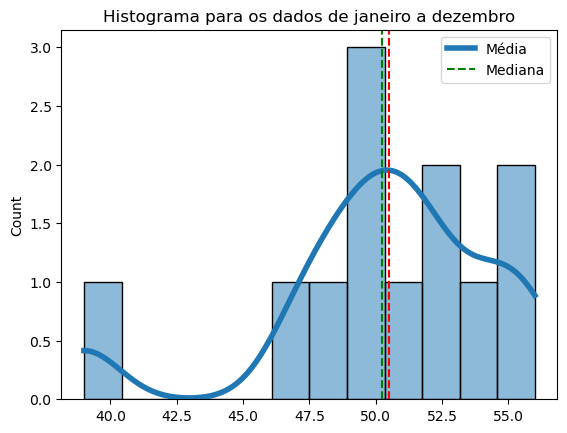

In [92]:
import numpy as np
sns.histplot(jan_to_dec, kde=True, kde_kws={'bw_adjust': 0.5}, line_kws={'alpha':1, 'linewidth': 4}, bins=12)
plt.axvline(x=np.mean(jan_to_dec), color='g', linestyle='--')
plt.axvline(x=np.median(jan_to_dec), color='r', linestyle='--')
plt.legend({'Média':np.mean(jan_to_dec), 'Mediana':np.median(jan_to_dec)})
plt.title('Histograma para os dados de janeiro a dezembro')
plt.show()

### Questão 2) Teste a normalidade dos dados de temperatura listados a seguir. Considere α = 5%.

<table align="center">
  <tr>
    <td align="center">12,5</td>
    <td align="center">14,2</td>
    <td align="center">13,4</td>
    <td align="center">14,6</td>
    <td align="center">12,7</td>
    <td align="center">10,9</td>
    <td align="center">16,5</td>
    <td align="center">14,7</td>
    <td align="center">11,2</td>
    <td align="center">10,9</td>
    <td align="center">12,1</td>
    <td align="center">12,8</td>
  </tr>
  <tr>
    <td align="center">13,8</td>
    <td align="center">13,5</td>
    <td align="center">13,2</td>
    <td align="center">14,1</td>
    <td align="center">15,5</td>
    <td align="center">16,2</td>
    <td align="center">10,8</td>
    <td align="center">14,3</td>
    <td align="center">12,8</td>
    <td align="center">12,4</td>
    <td align="center">11,4</td>
    <td align="center">16,2</td>
  </tr>
  <tr>
    <td align="center">14,3</td>
    <td align="center">14,8</td>
    <td align="center">14,6</td>
    <td align="center">13,7</td>
    <td align="center">13,5</td>
    <td align="center">10,8</td>
    <td align="center">10,4</td>
    <td align="center">11,5</td>
    <td align="center">11,9</td>
    <td align="center">11,3</td>
    <td align="center">14,2</td>
    <td align="center">11,2</td>
  </tr>
  <tr>
    <td align="center">13,4</td>
    <td align="center">16,1</td>
    <td align="center">13,5</td>
    <td align="center">17,5</td>
    <td align="center">16,2</td>
    <td align="center">15,0</td>
    <td align="center">14,2</td>
    <td align="center">13,2</td>
    <td align="center">12,4</td>
    <td align="center">13,4</td>
    <td align="center">12,7</td>
    <td align="center">11,2</td>
  </tr>
</table>



In [94]:
from scipy.stats import shapiro

# Dados de temperatura
data = [12.5, 14.2, 13.4, 14.6, 12.7, 10.9, 16.5, 14.7, 11.2, 10.9, 12.1, 12.8, 13.8, 13.5, 13.2, 14.1, 15.5, 16.2, 10.8, 14.3, 12.8, 12.4, 11.4, 16.2, 14.3, 14.8, 14.6, 13.7, 13.5, 10.8, 10.4, 11.5, 11.9, 11.3, 14.2, 11.2, 13.4, 16.1, 13.5, 17.5, 16.2, 15.0, 14.2, 13.2, 12.4, 13.4, 12.7, 11.2]

# Realiza o teste de Shapiro-Wilk
stat, p = shapiro(data)
# Nível de significância
alpha = 0.05

# Verifica se o valor-p é menor que o nível de significância
if p < alpha:
    print('Rejeitamos a hipótese de que os dados seguem uma distribuição normal.')
else:
    print('Não podemos rejeitar a hipótese de que os dados seguem uma distribuição normal.')


Não podemos rejeitar a hipótese de que os dados seguem uma distribuição normal.


In [95]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def variance(data, ddof=0):
     n = len(data)
     mean = sum(data) / n
     return sum((x - mean) ** 2 for x in data) / (n - ddof)


def shapiro_test(data, coeficients, critical_value, alpha=0.05):
    if len(coeficients) == 0:
        return False
    if not (len(data)/2) - 1 <= len(coeficients) <= (len(data)/2) + 1:
        return False

    data = sorted(data, reverse=True)

    df = pd.DataFrame(columns=["i", "n-i-1", "Ai,n", "X(n-i-1)", "X(i)", "Ai,n * (X(n-i-1) - X(i))"])
    df["i"] = range(len(data)//2)
    df["n-i-1"] = range(len(data)-1, len(data)//2-1, -1)
    df["Ai,n"] = coeficients
    df["X(n-i-1)"] = data[:len(data)//2]
    df["X(i)"] = data[:len(data)//2-1:-1]
    df["Ai,n * (X(n-i-1) - X(i))"] = df["Ai,n"] *  (df["X(n-i-1)"] - df["X(i)"])

    var = variance(data, ddof=1)
    sum = df["Ai,n * (X(n-i-1) - X(i))"].sum()

    W = (sum**2) / (var * (len(data) - 1))


    if W > critical_value:
        return "A amostra é obtida de uma população com distribuição normal", W, df
    else:
        return "A amostra é obtida de uma população com NÃO distribuição normal", W, df

data = [12.5, 14.2, 13.4, 14.6, 12.7, 10.9, 16.5, 14.7, 11.2, 10.9, 12.1, 12.8, 13.8, 13.5, 13.2, 14.1, 15.5, 16.2, 10.8, 14.3, 12.8, 12.4, 11.4, 16.2, 14.3, 14.8, 14.6, 13.7, 13.5, 10.8, 10.4, 11.5, 11.9, 11.3, 14.2, 11.2, 13.4, 16.1, 13.5, 17.5, 16.2, 15.0, 14.2, 13.2, 12.4, 13.4, 12.7, 11.2]
coefs = [0.3789,0.2604,0.2281,0.2045,0.1855,0.1693,0.1551,0.1423,0.1306,0.1197,0.1095,0.0998,0.0906,0.0817,0.0731,0.0648,0.0568,0.0489,0.0411,0.0335,0.0259,0.0185,0.0111,0.0037]
alpha = 0.05
critical_value = 0.947
string_result, W, df = shapiro_test(data, coefs, critical_value, alpha)
print(f"""
{string_result}
W = {round(W,3)}
Alfa = {alpha}
Valor crítico = {critical_value}
""")


A amostra é obtida de uma população com distribuição normal
W = 0.961
Alfa = 0.05
Valor crítico = 0.947



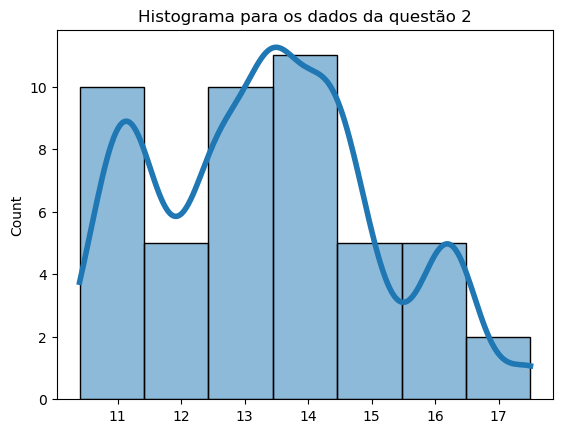

In [96]:
sns.histplot(questao_2, kde=True, kde_kws={'bw_adjust': 0.5}, line_kws={'alpha':1, 'linewidth': 4})
plt.title('Histograma para os dados da questão 2')
plt.show()

### Questão 3) A tabela a seguir apresenta as médias finais de dois alunos em nove disciplinas. Verifique se há homogeneidade de variâncias entre os alunos (α= 5%).

In [97]:
from scipy.stats import levene


# The scores for each student
student1_scores = [6.4, 5.8, 6.9, 5.4, 7.3, 8.2, 6.1, 5.5, 6.0]
student2_scores = [6.5, 7.0, 7.5, 6.5, 8.1, 9.0, 7.5, 6.5, 6.8]

# Perform the Levene's test
levene_results = levene(student1_scores, student2_scores)

# Print the test statistic and p-value
print("L = ", round(levene_results.statistic,3))
print("Valor crítico = ", round(levene_results.pvalue, 3))


from scipy.stats import bartlett

# The scores for each student
student1_scores = [6.4, 5.8, 6.9, 5.4, 7.3, 8.2, 6.1, 5.5, 6.0]
student2_scores = [6.5, 7.0, 7.5, 6.5, 8.1, 9.0, 7.5, 6.5, 6.8]

if levene_results.pvalue < 0.05:
    print('Os dados não têm uma variação homogenea')
else:
    print('Os dados têm uma variação homogenea')

L =  0.013
Valor crítico =  0.911
Os dados têm uma variação homogenea


### Questão 4) Um fabricante de iogurtes desnatados afirma que a quantidade de calorias em cada pote é 60 cal. Para verificar se essa informação procede, uma amostra aleatória com 36 potes é coletada, observando-se que a quantidade média de calorias é de 65 cal com desvio-padrão 3,5. Aplique o teste adequado e verifique se a afirmação do fabricante é verdadeira, considerando o nível de significância de 5%.

In [98]:
#H0 = 60
#HA > 60

mi = 60
x_barra = 65
n = 36
std = 3.5
z_score = 1.645

if (x_barra - mi) / (std / (n ** 0.5)) > z_score:
    print("Rejeitamos a H0")
else:
    print("Não rejeitamos a H0")

print(f"""
μ = {mi}
x_barra = {x_barra}
n = {n}
σ = {std}
z_score = {z_score}
z = {round((x_barra - mi) / (std / (n ** 0.5)), 3)}
α = {alpha}

Para um α = 5%, as calorias médias são maiores que 60.
""")

Rejeitamos a H0

μ = 60
x_barra = 65
n = 36
σ = 3.5
z_score = 1.645
z = 8.571
α = 0.05

Para um α = 5%, as calorias médias são maiores que 60.



Questão 5) Deseja-se comparar o tempo médio de espera para atendimento (min) em 2
hospitais. Para isso, coletou-se uma amostra com 20 pacientes em cada hospital. Os dados estão
disponíveis nas tabelas a seguir. Verifique se há diferenças entre os tempos médios de espera
nos dois hospitais. Considere α = 1 %.
<p align=center>
<table style="display: inline-block; text-align: center; margin-right: 10px;">
  <caption>Hospital 1</caption>
  <tr>
    <td>72</td>
    <td>58</td>
    <td>91</td>
    <td>88</td>
    <td>70</td>
    <td>76</td>
    <td>98</td>
    <td>101</td>
    <td>65</td>
    <td>73</td>
  </tr>
  <tr>
    <td>79</td>
    <td>82</td>
    <td>80</td>
    <td>91</td>
    <td>93</td>
    <td>88</td>
    <td>97</td>
    <td>83</td>
    <td>71</td>
    <td>74</td>
  </tr>
</table>

<table style="display: inline-block; text-align: center;">
  <caption>Hospital 2</caption>
  <tr>
    <td>66</td>
    <td>40</td>
    <td>55</td>
    <td>70</td>
    <td>76</td>
    <td>61</td>
    <td>53</td>
    <td>50</td>
    <td>47</td>
    <td>61</td>
  </tr>
  <tr>
    <td>52</td>
    <td>48</td>
    <td>60</td>
    <td>72</td>
    <td>57</td>
    <td>70</td>
    <td>66</td>
    <td>55</td>
    <td>46</td>
    <td>51</td>
  </tr>
</table>
</p>


In [99]:
from scipy.stats import ttest_ind

hospital1_waiting_times = [72, 58, 91, 88, 70, 76, 98, 101, 65, 73, 79, 82, 80, 91, 93, 88, 97, 83, 71, 74]

hospital2_waiting_times = [66, 40, 55, 70, 76, 61, 53, 50, 47, 61, 52, 48, 60, 72, 57, 70, 66, 55, 46, 51]

ttest_results = ttest_ind(hospital1_waiting_times, hospital2_waiting_times)

alpha = 0.01

if ttest_results.pvalue < alpha and ttest_results.statistic < 0:
    print('A média da amostra 1 é menor que a média da amostra 2 e há uma diferença significativa entre as duas amostras')
elif ttest_results.pvalue < alpha and ttest_results.statistic > 0:
    print('A média da amostra 1 é maior que a média da amostra 2 e há uma diferença significativa entre as duas amostras')
elif ttest_results.pvalue > alpha and ttest_results.statistic < 0:
    print('A média da amostra 1 é menor que a média da amostra 2 e não há uma diferença significativa entre as duas amostras')
else:
    print('A média da amostra 1 é maior que a média da amostra 2 e não há uma diferença significativa entre as duas amostras')  


A média da amostra 1 é maior que a média da amostra 2 e há uma diferença significativa entre as duas amostras


Questão 6) Trinta adolescentes com nível de colesterol total acima do permitido foram submetidos a um tratamento que consistia em dieta e atividade fisica. As tabelas a seguir apresentam os índices de colesterol LDL (mg/ dL) antes e depois do tratamento. Verifique se o tratamento foi eficaz (α= 5%).
<table align="center">
<caption>Antes do tratamento</caption>
<tr>
<td>220</td>
<td>212</td>
<td>227</td>
<td>234</td>
<td>204</td>
<td>209</td>
<td>211</td>
<td>245</td>
<td>237</td>
<td>250</td>
</tr>
<tr>
<td>208</td>
<td>224</td>
<td>220</td>
<td>218</td>
<td>208</td>
<td>205</td>
<td>227</td>
<td>207</td>
<td>222</td>
<td>213</td>
</tr>
<tr>
<td>210</td>
<td>234</td>
<td>240</td>
<td>227</td>
<td>229</td>
<td>224</td>
<td>204</td>
<td>210</td>
<td>215</td>
<td>228</td>
</tr>
</table>

<table align="center">
<caption>Depois do tratamento</caption>
<tr>
<td>195</td>
<td>180</td>
<td>200</td>
<td>204</td>
<td>180</td>
<td>195</td>
<td>200</td>
<td>210</td>
<td>205</td>
<td>211</td>
</tr>
<tr>
<td>175</td>
<td>198</td>
<td>195</td>
<td>200</td>
<td>190</td>
<td>200</td>
<td>222</td>
<td>198</td>
<td>201</td>
<td>194</td>
</tr>
<tr>
<td>190</td>
<td>204</td>
<td>230</td>
<td>222</td>
<td>209</td>
<td>198</td>
<td>195</td>
<td>190</td>
<td>201</td>
<td>210</td>
</tr>
</table>


In [100]:
from scipy.stats import ttest_ind

before_treatment = [220, 212, 227, 234, 204, 209, 211, 245, 237, 250, 208, 224, 220, 218, 208, 205, 227, 207, 222, 213, 210, 234, 240, 227, 229, 224, 204, 210, 215, 228]
after_treatment = [195, 180, 200, 204, 180, 195, 200, 210, 205, 211, 175, 198, 195, 200, 190, 200, 222, 198, 201, 194, 190, 204, 230, 222, 209, 198, 195, 190, 201, 210]
alpha = 0.05

# Perform the two-sample t-test
ttest_results = ttest_ind(before_treatment, after_treatment)

# Print the test statistic and p-value
print("t-test statistic:", ttest_results.statistic)
print("t-test p-value:", ttest_results.pvalue)

# If the t-statistic is greater than the critical value, the null hypothesis would be rejected and it could be concluded that the treatment was effective.
if ttest_results.pvalue < alpha:
    print('O tratamento foi eficaz')
else:
    print('O tratamento não foi eficaz')

t-test statistic: 6.476923392390189
t-test p-value: 2.2030102509689803e-08
O tratamento foi eficaz
